In [1]:
from class_utils2_runmodels_DQN import ddqn_agent 
import numpy as np
import gym 

env = gym.make("LunarLander-v2")

obs_space = env.observation_space
action_space = env.action_space

episode_num = 100

#--------------------ddqn agent parameters-----------------------------
gamma = 0.99
epsilon = 1.0
epsilon_dec = 0.996
epsilon_end = 0.1
buffer_size = 32000
batch_size = 32
learning_rate = 0.001 #by default = 0.001 change by passing in Adam(lr=learning_rate)
#--------------------ddqn agent parameters-----------------------------

total_scores = []
mean_scores = []
agent = ddqn_agent(gamma, epsilon, buffer_size, batch_size, epsilon_dec, epsilon_end)    #takes in gamma episilon and buffer size of memory and batch_size. learning rate(alpha) can be passed

In [2]:
agent.reload_agent()

In [3]:
for episode_count in range(0, episode_num):
    terminal = False
    score = 0
    state, dummy = env.reset()
    action_count = 0
    while not terminal:
        action, action_array = agent.choose_action(state)

        next_state, reward, terminal, dummy2, dummy3 = env.step(action)
        
        score += reward
        state = next_state
    
        if(action_count >= 650):
            break
        action_count += 1
    total_scores.append(score)
    mean = np.mean(total_scores)
    mean_scores.append(mean)
    print("episode: ", episode_count, " score: ", score, " mean score: ", mean)

episode:  0  score:  -37.83530793197697  mean score:  -37.83530793197697
episode:  1  score:  -17.42251329668011  mean score:  -27.62891061432854
episode:  2  score:  75.84705187337234  mean score:  6.863076881571753
episode:  3  score:  -193.0912859654104  mean score:  -43.12551383017379
episode:  4  score:  -213.29899860698643  mean score:  -77.16021078553631
episode:  5  score:  -15.043161735102245  mean score:  -66.80736927713063
episode:  6  score:  233.18611194705684  mean score:  -23.951157673675276
episode:  7  score:  -197.122026740443  mean score:  -45.59751630702125
episode:  8  score:  266.387886546519  mean score:  -10.932471545516782
episode:  9  score:  -203.6704069672415  mean score:  -30.206265087689253
episode:  10  score:  103.59609534946385  mean score:  -18.042414138857154
episode:  11  score:  -176.11894970658585  mean score:  -31.21545876950121
episode:  12  score:  236.67327209791338  mean score:  -10.608633318161626
episode:  13  score:  -193.5808084760788  mea

In [5]:
print(len(mean_scores))
print(len(total_scores))

100
100


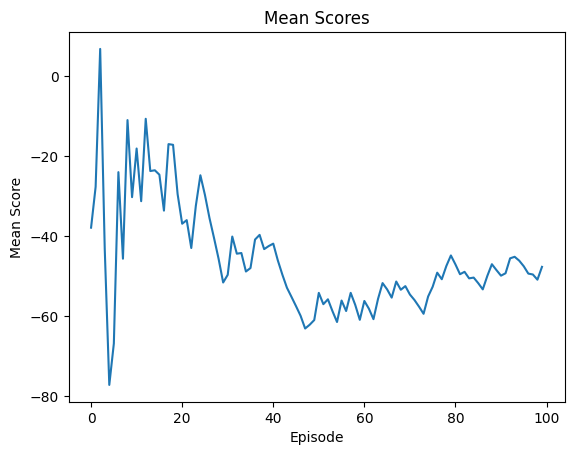

In [7]:
import matplotlib.pyplot as plt

x_axis = list(range(0, 100))
y_axis = mean_scores

plt.plot(x_axis, y_axis)
plt.title('Mean Scores')
plt.xlabel('Episode')
plt.ylabel('Mean Score')
plt.show()

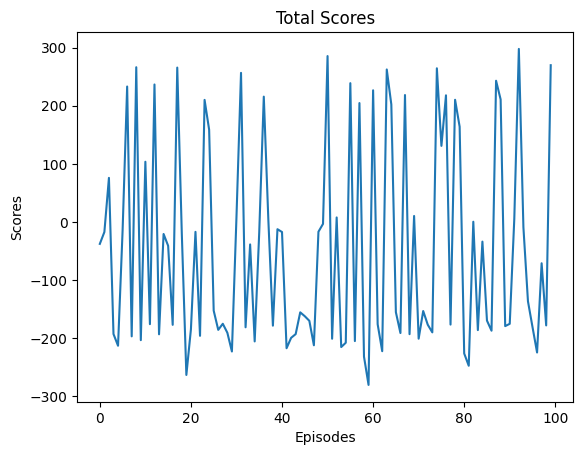

In [8]:
x_axis = list(range(0, 100))
y_axis = total_scores

plt.plot(x_axis, y_axis)
plt.title('Total Scores')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.show()

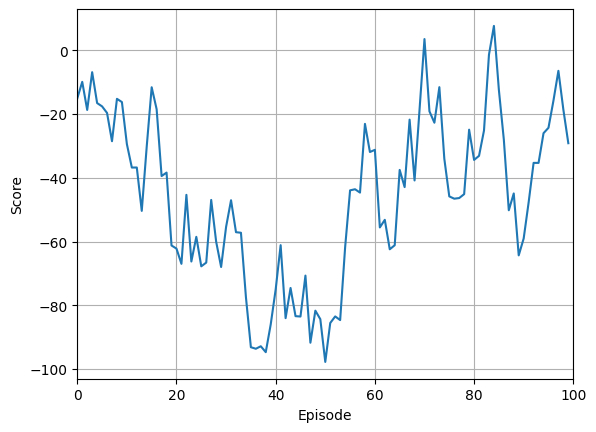

In [9]:
import numpy as np

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = list(range(0, 100))
y = total_scores

y_av = movingaverage(y, 20)
plt.plot(x, y_av)
plt.xlim(0,100)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.grid(True)
plt.show()